# ****Análise Estatística e Machine Learning na Precificação de Carros Usados (OP1)****

### Instalndo os pacotes necessários
pip install -r rqts.txt

### Importando as Bibliotecas Necessárias

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import missingno as msno

### Lendo o DataSet

In [394]:
df = pd.read_csv('cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [395]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [396]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [397]:
df = df.sample(frac=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,Honda City 1.5 GXI,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
4400,Volkswagen Polo 1.0 TSI Highline Plus,2020,808000,5000,Petrol,Individual,Manual,First Owner,18.24 kmpl,999 CC,108.6 bhp,175nm@ 1750-4000rpm,5.0
6066,Maruti Swift VDI BSIV,2017,590000,30000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3602,Maruti Ertiga ZDI Plus,2018,1050000,10000,Diesel,Individual,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5076,Nissan Sunny Diesel XV,2013,350000,120000,Diesel,Individual,Manual,First Owner,21.64 kmpl,1461 CC,84.8 bhp,200Nm@ 2000rpm,5.0


In [398]:
#organizando as colunas
ordem = []

### Adpatando os Dados

In [399]:
# Verificando a viabiliade de incluir a coluna de marca do carro na análise de regressão

def marcaCarro(nome):
    return nome.split(' ')[0]

marcas = []

for modelo in df['name'].array:
    marca = marcaCarro(modelo)
    if marca not in marcas:
        marcas.append(marca)


marcas.sort()
print(marcas)
print(len(marcas))

# Como existem 32 masrcas de carro, não consideremos viável incluir ela para o estudo de regressão

['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']
32


In [400]:
# Verificar a

In [401]:
# Retirando a coluna'name'(que não influencia no valor)
df.drop((['name']),axis=1,inplace=True)

In [402]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
4400,2020,808000,5000,Petrol,Individual,Manual,First Owner,18.24 kmpl,999 CC,108.6 bhp,175nm@ 1750-4000rpm,5.0
6066,2017,590000,30000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3602,2018,1050000,10000,Diesel,Individual,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5076,2013,350000,120000,Diesel,Individual,Manual,First Owner,21.64 kmpl,1461 CC,84.8 bhp,200Nm@ 2000rpm,5.0


In [403]:
# Verificando dados duplicados e retirando-os

df[df.duplicated()].shape
df.drop_duplicates(inplace=True)
df.shape

(6907, 12)

In [404]:
# Verificando os dados Vazios
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [405]:
# Os dados com valores vários representam apenas 3% da amosta, outra opçõa seria preencher os dados vazios com a média de todos os valores.
# Retirando valores nulos:
df = df.dropna()
df.shape

(6698, 12)

In [406]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,2004,198000,110000,Petrol,Individual,Manual,Third Owner,12.8 kmpl,1493 CC,100 bhp,13.1kgm@ 4600rpm,5.0
4400,2020,808000,5000,Petrol,Individual,Manual,First Owner,18.24 kmpl,999 CC,108.6 bhp,175nm@ 1750-4000rpm,5.0
6066,2017,590000,30000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3602,2018,1050000,10000,Diesel,Individual,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5076,2013,350000,120000,Diesel,Individual,Manual,First Owner,21.64 kmpl,1461 CC,84.8 bhp,200Nm@ 2000rpm,5.0


C:\Users\Pichau\AppData\Local\Temp\ipykernel_9056\1394322060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=df, palette='bright')


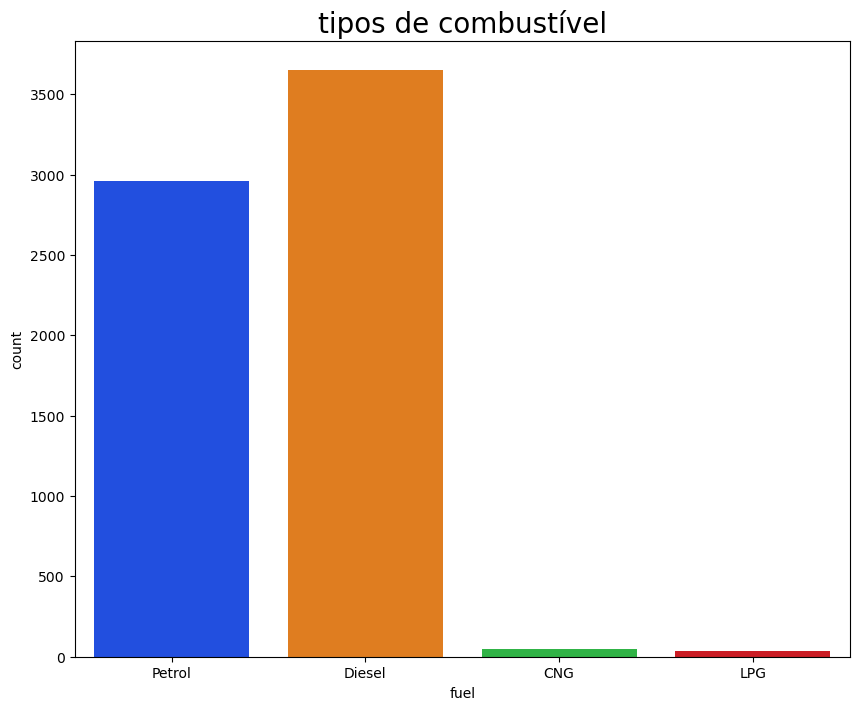

In [407]:
plt.figure(figsize=(10, 8))

sns.countplot(x='fuel', data=df, palette='bright')

plt.title('tipos de combustível', size=20)

plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_9056\2371476270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_type',data=df,palette='bright')


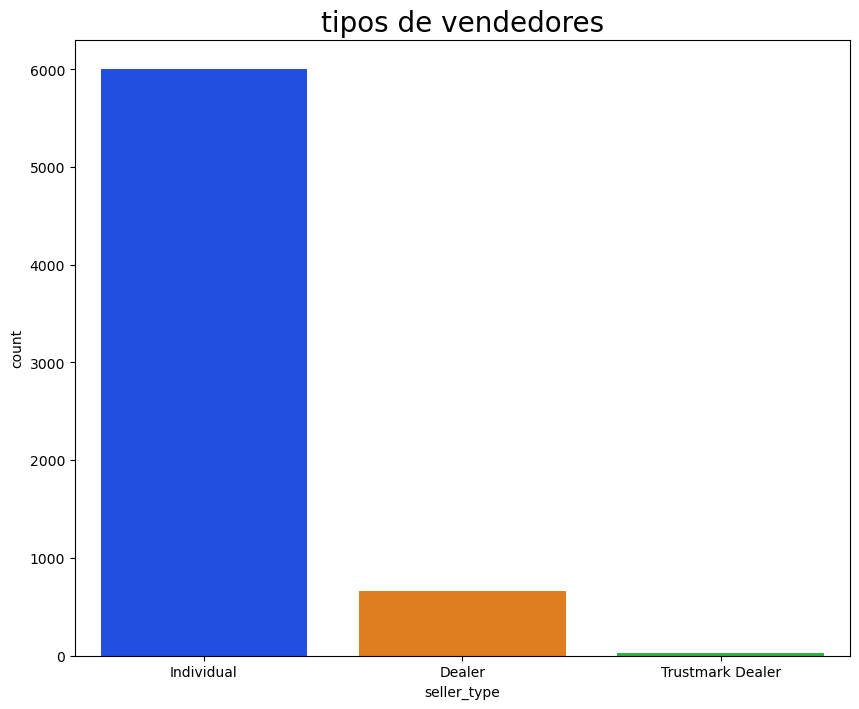

In [408]:
plt.figure(figsize=(10,8))
sns.countplot(x='seller_type',data=df,palette='bright')
plt.title('tipos de vendedores',size=20)
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_9056\779428977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owner',data=df,palette='bright')


Text(0.5, 1.0, 'números de dono por carro')

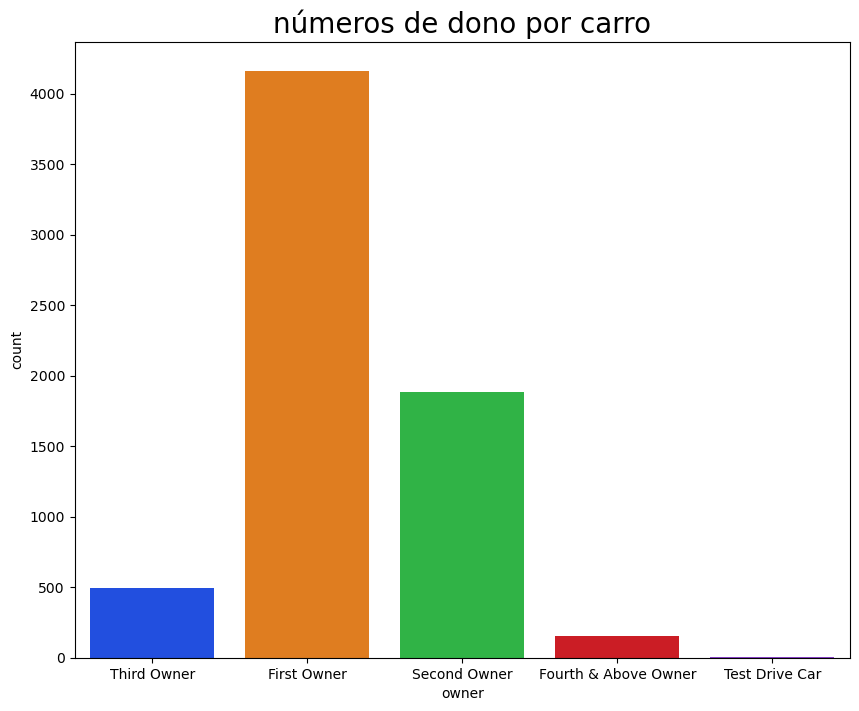

In [409]:
plt.figure(figsize=(10,8))
sns.countplot(x='owner',data=df,palette='bright')
plt.title('números de dono por carro',size=20)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_9056\2249749700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seats',data=df,palette='bright')


Text(0.5, 1.0, 'Seats types of sold cars')

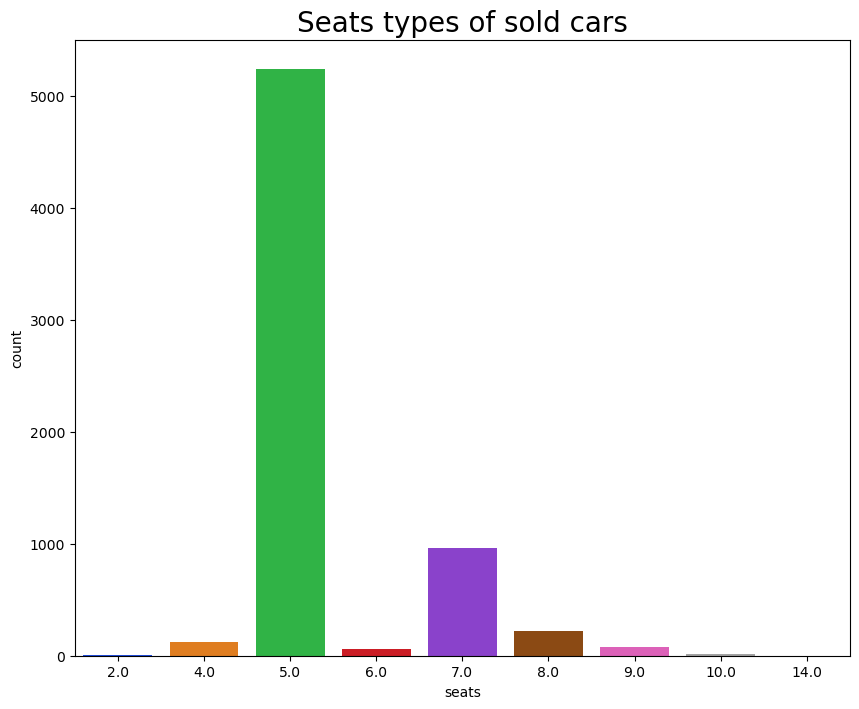

In [410]:
plt.figure(figsize=(10,8))
sns.countplot(x='seats',data=df,palette='bright')
plt.title('Seats types of sold cars',size=20)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_9056\2616205667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission',data=df,palette='bright')


Text(0.5, 1.0, 'Transmission type of cars')

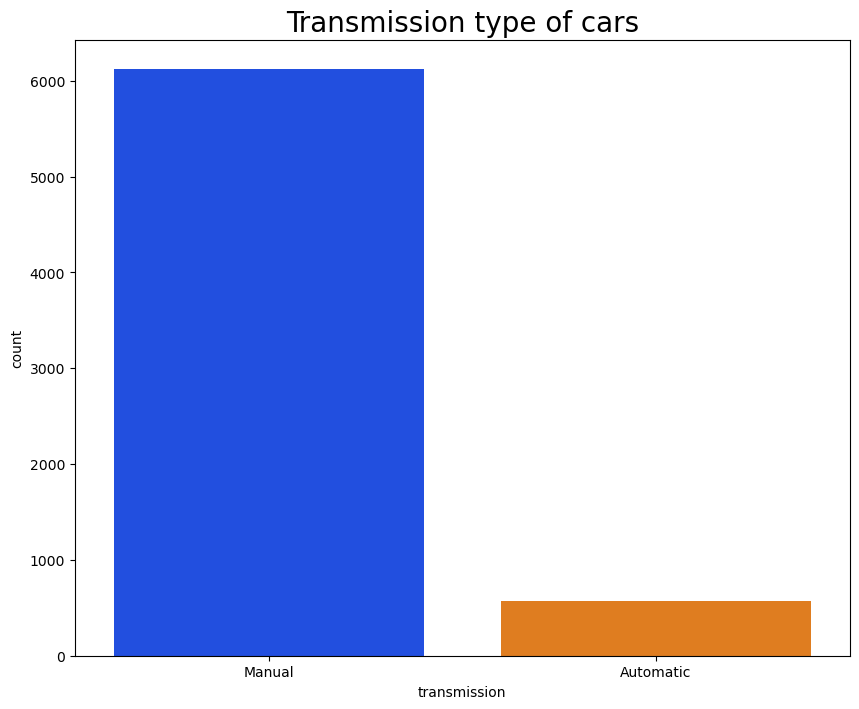

In [411]:
plt.figure(figsize=(10,8))
sns.countplot(x='transmission',data=df,palette='bright')
plt.title('Transmission type of cars',size=20)

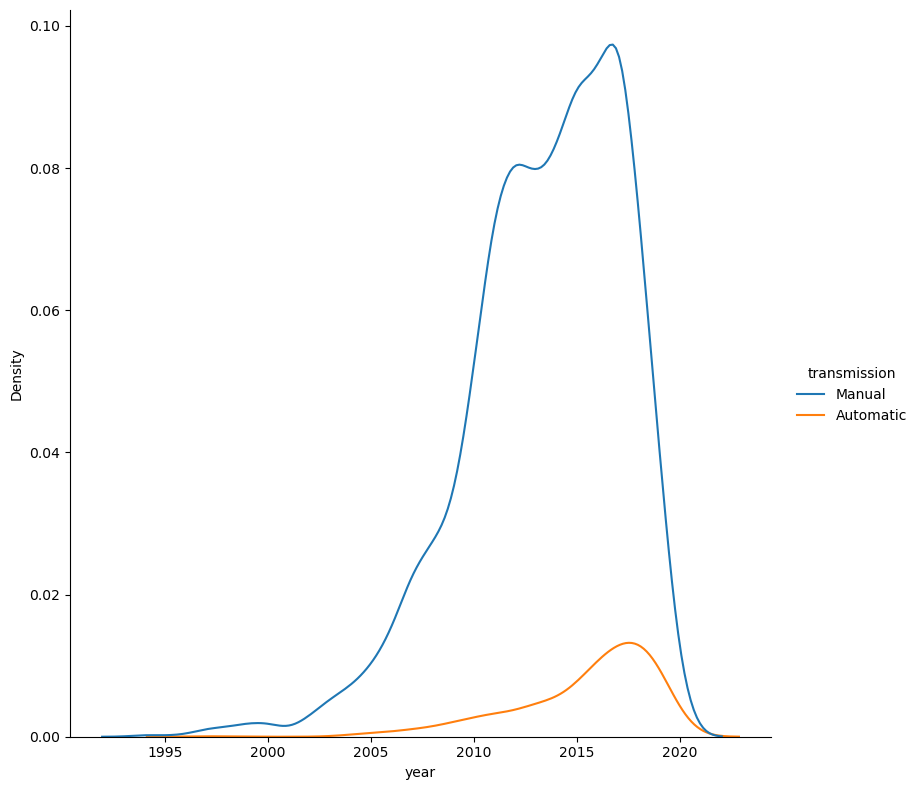

In [412]:
sns.displot(data = df, x = "year", hue = "transmission", kind = "kde",height=8)


In [413]:
import re # biblioteca pra ajudar no tratamento da variável torque, boa pra se manipular strings

# Transformar dados str → float
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

df['fuel'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1, 'LPG': 2, 'CNG': 3})
# LPG (Liquefied Petroleum Gas)
# CNG (Compressed Natural Gas):

df['seller_type'] = df['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
# Individual: vendedores particulares ou proprietários individuais que estão vendendo seus veículos, sem envolver empresas ou concessionárias
# Dealer: o veículo está sendo vendido por uma concessionária ou revendedor
# Trustmark Dealer: revendedor ou concessionária certificada, pela entidade TrustMark que garante que as empresas atendam aos padrões exigidos e se comprometam com um bom atendimento ao cliente

# VANTAGENS:
# Individual: Vendas diretas, geralmente mais baratas, mas com maior risco em termos de garantia e histórico do veículo.
# Dealer: Um intermediário confiável, mas pode ter custos adicionais.
# Trustmark Dealer: Provavelmente a opção mais confiável, mas geralmente mais cara devido a certificações e garantias extras.

df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

# número de donos anteriores
df['owner'] = df['owner'].map({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4})
# 'Test Drive Car': carro zero km

df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
# eficiência do carro quantos km ele faz por litro

df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)
# volume dos cilindros de um motor (cilindradas) em cc (centímetros cúbicos)

df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
# potência do motor em bhp (cavalos-vapor), capacidade do motor de realizar trabalho

# convertendo valores q estejam em kgm (kilo metro) em nm@ (newton metro)
def clean_torque(torque):
    # Remove o caractere '@' e tudo após ele
    torque = torque.split('@')[0].strip()
    
    # Verifica se a string contém "kgm"
    if 'kgm' in torque:
        # Extraí o valor numérico antes de 'kgm' e converte para Nm
        value = float(re.sub(r'[^\d.]', '', torque.split('kgm')[0].strip()))  # Remove qualquer caractere não numérico
        return value * 9.81  # Converte para Nm
    elif 'Nm' in torque:
        # Caso o torque já esteja em Nm, apenas extrai o número
        value = float(re.sub(r'[^\d.]', '', torque.split('Nm')[0].strip()))  # Remove qualquer caractere não numérico
        return value  # Retorna o valor em Nm
    else:
        # Para casos inesperados, retorna NaN
        return 0

# Aplica a função para a coluna 'torque'
df['torque'] = df['torque'].apply(clean_torque)


# torque: força máxima que o motor exerce em nm@ 

df.head()


['Petrol' 'Diesel' 'CNG' 'LPG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Third Owner' 'First Owner' 'Second Owner' 'Fourth & Above Owner'
 'Test Drive Car']


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1971,2004,198000,110000,0,0,0,2,12.80,1493.0,100.0,128.511,5.0
4400,2020,808000,5000,0,0,0,0,18.24,999.0,108.6,0.000,5.0
6066,2017,590000,30000,1,0,0,0,25.20,1248.0,74.0,190.000,5.0
3602,2018,1050000,10000,1,0,0,0,25.47,1248.0,88.5,200.000,7.0
5076,2013,350000,120000,1,0,0,0,21.64,1461.0,84.8,200.000,5.0


In [414]:
# mostra a relação q as variáveis x tem com o y ['preco_de_venda']

corr = df.corr()
corr['selling_price']

year             0.427672
selling_price    1.000000
km_driven       -0.161663
fuel             0.202704
seller_type      0.250394
transmission     0.465596
owner           -0.209482
mileage         -0.108264
engine           0.442896
max_power        0.692409
torque           0.024282
seats            0.158134
Name: selling_price, dtype: float64

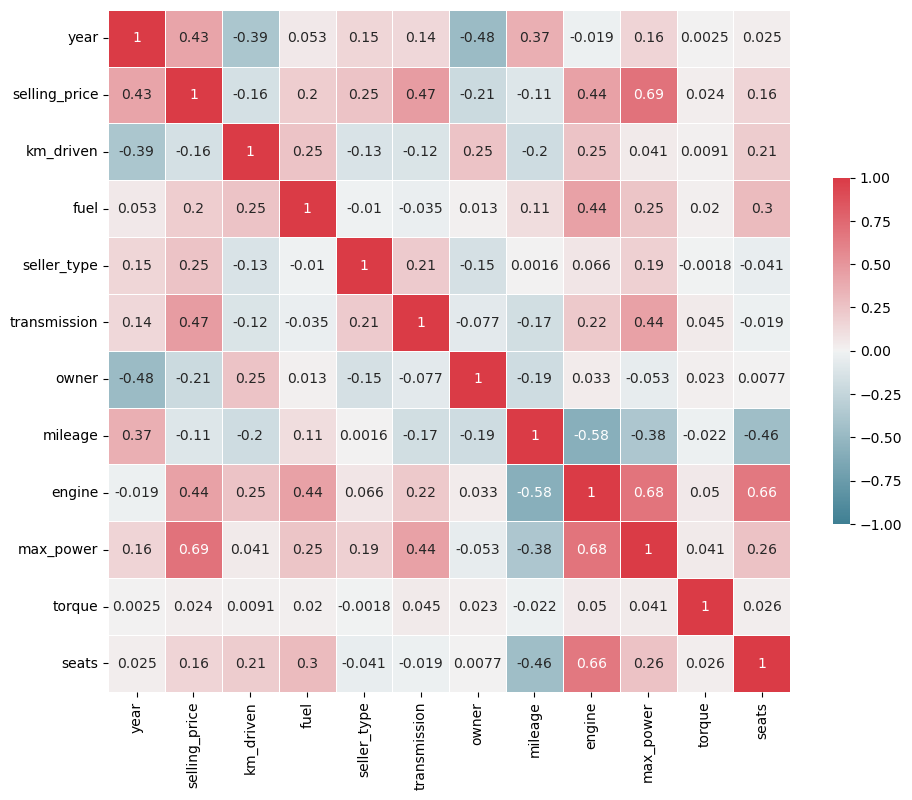

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais fatores estão mais correlacionados?

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()